In [3]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

In [23]:
true_mean = [1,3/2,6]
data = []
for i in range(100):
    for j in range(3):
        data.append([np.random.normal(loc=true_mean[j],scale=0.5,size = 1)[0],j])
data = pd.DataFrame(data,columns = ['x','group'])
data

,x,group
0,0.903109,0
1,0.996862,1
2,6.378077,2
3,0.820511,0
4,2.080796,1
...,...,...
295,1.372300,1
296,5.777387,2
297,0.996059,0
298,0.265286,1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha1, alpha2, alpha3]


Output()

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 6 seconds.


array([[<Axes: title={'center': 'alpha1'}>,
        <Axes: title={'center': 'alpha1'}>],
       [<Axes: title={'center': 'alpha2'}>,
        <Axes: title={'center': 'alpha2'}>],
       [<Axes: title={'center': 'alpha3'}>,
        <Axes: title={'center': 'alpha3'}>]], dtype=object)

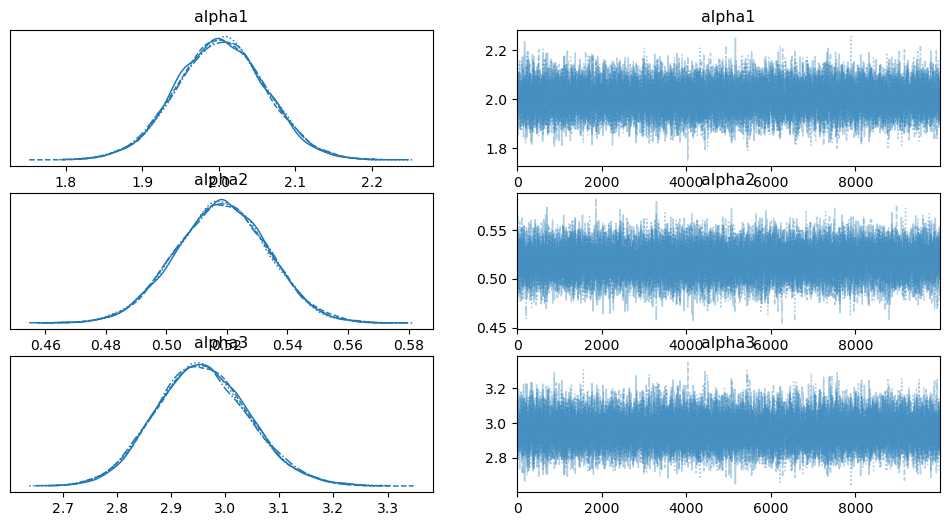

In [21]:
with pm.Model() as basic_model:
    alpha1 = pm.Normal('alpha1',mu=2,sigma=0.5)
    alpha2 = pm.Normal('alpha2',mu = 1/2,sigma=0.5)
    alpha3 = pm.Normal('alpha3',mu=3,sigma=0.5)
    def f(alpha1,alpha2,alpha3):
        return [alpha1*alpha2,alpha2*alpha3,alpha3*alpha1]
    mean = f(alpha1,alpha2,alpha3)
    var = {}
    for i in range(len(mean)):

        var[f'obs{i}'] = pm.Normal(f'obs{i}',mu= mean[i],sigma = 0.5,observed=np.array(data[data['group']==i]['x']))
    trace = pm.sample(10000, tune=1000, return_inferencedata=True)
az.summary(trace)
az.plot_trace(trace)

In [17]:
np.array(data[data['group']==1]['x'])

array([0.78895635, 0.37887612, 1.59102985, 1.64884131, 0.93779823,
       1.63632056, 0.97646729, 1.40302299, 1.68385097, 1.32402411,
       1.92984264, 1.1974419 , 0.97019904, 1.09612845, 1.26999714,
       2.23870415, 1.38419011, 1.34861775, 2.08213019, 1.41754627,
       2.64603086, 2.11332475, 0.44333294, 2.16854459, 1.57742417,
       2.40231993, 1.66260815, 1.41256299, 1.46942466, 1.36281291,
       1.45434497, 1.60077069, 1.41282571, 1.60254222, 0.81731025,
       1.82940569, 2.029306  , 1.57485572, 1.84407166, 1.67639662,
       0.7081082 , 2.19753475, 1.91626135, 2.06954991, 2.56491513,
       2.23469014, 1.42118262, 0.83132168, 1.8275113 , 1.15302762,
       1.84622809, 2.2532798 , 0.92695233, 1.4367346 , 1.65762532,
       2.16810399, 1.19161168, 2.00256021, 2.40266854, 0.9584306 ,
       1.83118845, 1.40114234, 1.95246293, 1.17952035, 1.82034163,
       0.66688731, 2.00294044, 0.94022036, 1.91306953, 2.12366451,
       0.28587157, 0.89914495, 2.29382835, 2.39933449, 1.63999

In [22]:
print(az.summary(trace)['mean'])
print(az.summary(trace)['sd'])

alpha1    2.003
alpha2    0.518
alpha3    2.958
Name: mean, dtype: float64
alpha1    0.059
alpha2    0.015
alpha3    0.087
Name: sd, dtype: float64
